# Latest Spectrogram!

In [44]:
# importing general Python libraries
import pandas as pd
import datetime as dt
import os
import matplotlib.pyplot as plt
import pytz
import plotly.graph_objects as go

In [45]:
# importing orcasound_noise libraries
from orcasound_noise.pipeline.pipeline import NoiseAnalysisPipeline
from orcasound_noise.utils import Hydrophone
from orcasound_noise.pipeline.acoustic_util import plot_spec, plot_bb

In [46]:
# Set Location and Resolution
# Port Townsend, 1 Hz Frequency, 60-second samples
# if __name__ == '__main__':
# pipeline = NoiseAnalysisPipeline(Hydrophone.PORT_TOWNSEND,
#                                     delta_f=10, bands=None,
#                                     delta_t=60, mode='safe')


# Set Location and Resolution
# Port Townsend, 1 Hz Frequency, 60-second samples
# if __name__ == '__main__':
pipeline = NoiseAnalysisPipeline(Hydrophone.ORCASOUND_LAB,
                                     delta_f=10, bands=None,
                                     delta_t=60, mode='safe')

In [47]:
%%capture cap
# Generate parquet dataframes with noise levels for a time period

now = dt.datetime.now(pytz.timezone('US/Pacific'))
psd_path, broadband_path = pipeline.generate_parquet_file(now - dt.timedelta(hours = 24), 
                                                          now - dt.timedelta(hours = 23), 
                                                          upload_to_s3=False);

ffmpeg version 7.0 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 15.0.0 (clang-1500.1.0.2.5)
  configuration: --prefix=/usr/local/Cellar/ffmpeg/7.0 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libopenvino --en

In [48]:
# Read the parquet files
psd_df = pd.read_parquet(psd_path)
bb_df = pd.read_parquet(broadband_path)

In [49]:
# Create a new directory if it does not exist
if not os.path.exists('img'):
   os.makedirs('img')

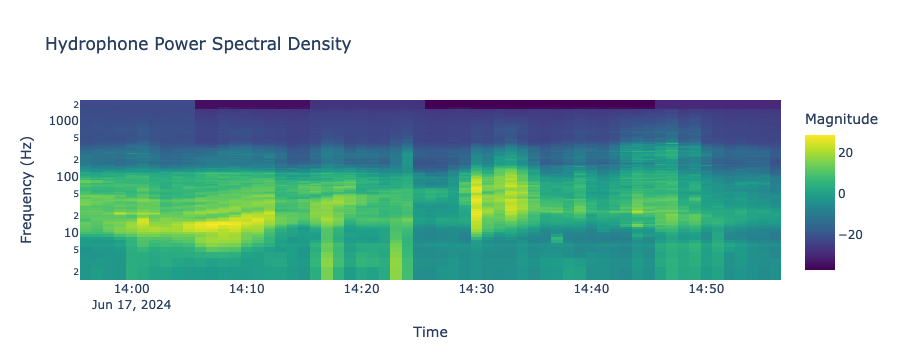

In [50]:
# Create and save psd plot 
fig = plot_spec(psd_df)
#fig.write_image('img/psd.png')
fig.show()

/var/folders/x7/xtv7b_3d7d9d0m9gzz8q3vb00000gn/T/ipykernel_66700/1815181407.py:5: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



<Figure size 500x1000 with 0 Axes>

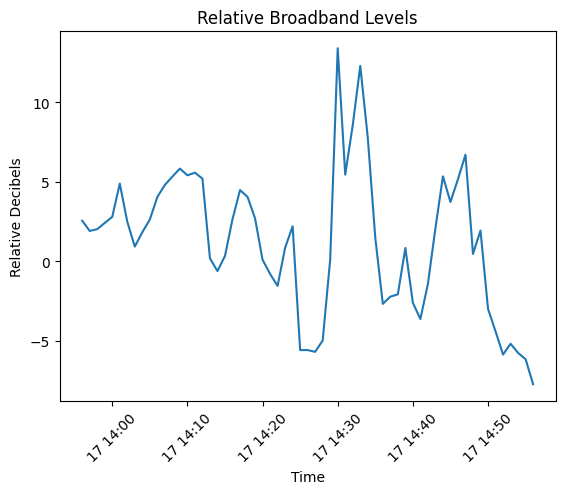

In [56]:
# Create and save bb plot
# plt.figure(figsize=(5, 10))
# fig = plot_bb(bb_df)
#fig.savefig('img/broadband.png')
# fig.show()

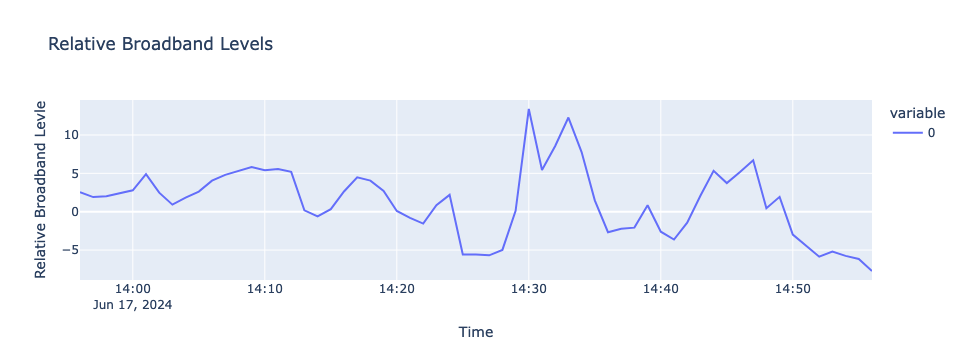

In [65]:
import plotly.express as px
fig = px.line(bb_df, labels={
                     "index": "Time",
                     "value": "Relative Broadband Levle",
                 }, title='Relative Broadband Levels')
fig.show()

In [62]:
bb_df

0
2024-06-17 13:56:00  2.550225
2024-06-17 13:57:00  1.904693
2024-06-17 13:58:00  2.017777
2024-06-17 13:59:00  2.407982
2024-06-17 14:00:00  2.792282
...                       ...
2024-06-17 14:52:00 -5.863422
2024-06-17 14:53:00 -5.185909
2024-06-17 14:54:00 -5.757757
2024-06-17 14:55:00 -6.155220
2024-06-17 14:56:00 -7.730595

[61 rows x 1 columns]